<a href="https://colab.research.google.com/github/TaniaNaum/-/blob/main/%D0%9F%D1%80%D0%B8%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-15-1ae6aef36714>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 1).astype(np.int)


Accuracy: 0.6333333333333333
Confusion Matrix:
 [[18  3]
 [ 8  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.25      0.11      0.15         9

    accuracy                           0.63        30
   macro avg       0.47      0.48      0.46        30
weighted avg       0.56      0.63      0.58        30



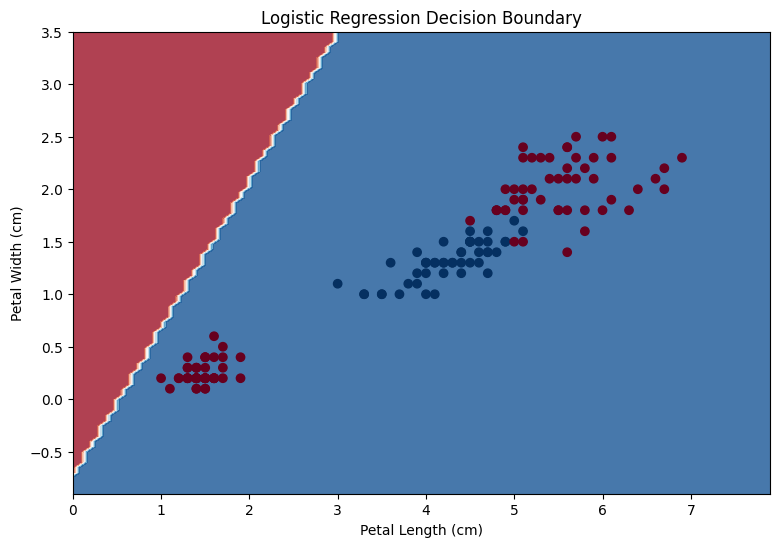

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузим набор данных Iris
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = (iris.target == 1).astype(np.int)

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные (масштабируем признаки)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создадим и обучим модель логистической регрессии
model = LogisticRegression(random_state=50)
model.fit(X_train, y_train)

# Сделаем предсказания на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценим качество модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Визуализируем решающую границу модели
plt.figure(figsize=(9, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() -1, X[:, 0].max() + 1, 90),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 90))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Logistic Regression Decision Boundary")
plt.show()